# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import trange
%matplotlib inline

import sys
sys.path.append('C:\\Users\\lucai\\nuvPriors_repo\\nuvPriors')
from src.models.clfModel import CLFModel

# 1-Dimensional Case

## Data Generation

Text(0.5, 0.98, 'Generated Observations')

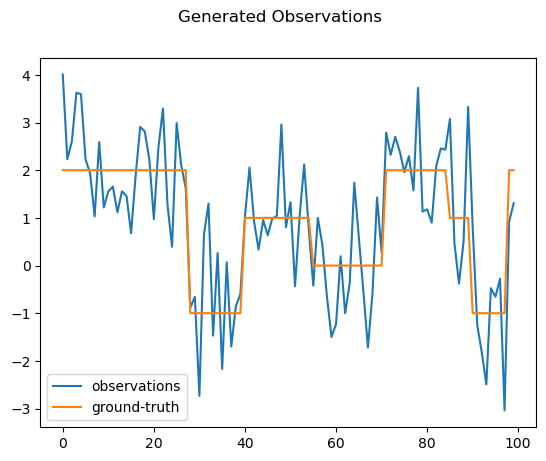

In [2]:
# Specify parameters
N = 100
M = 4
D = 1
varNoise = 1.0
seed = 0
np.random.seed(seed)

# Specify levels and array with level indices
levels = np.array([[-1.0], [0.0], [1.0], [2.0]])
selectedLevels = np.zeros(N, dtype=int)
ind_start = 0
while ind_start < N:
    ind_stop = ind_start + np.random.randint(low=int(N/20), high=int(N/10))
    selectedLevels[ind_start:ind_stop] = np.random.randint(low=0, high=M)
    ind_start = ind_stop
    
# Calculate X and Y
x = np.array([levels[selectedLevel_i] for selectedLevel_i in selectedLevels])
y = np.random.normal(x,varNoise)

# Plot data
fig1, axs1 = plt.subplots()
axs1.plot(y, label='observations')
axs1.plot(x, label='ground-truth')
axs1.legend()
fig1.suptitle('Generated Observations')

## Estimation
with 'levelEstType' = 'superPos' (default)

  2%|█▋                                                                              | 21/1000 [00:00<00:10, 92.73it/s]


(1000, 4, 1)


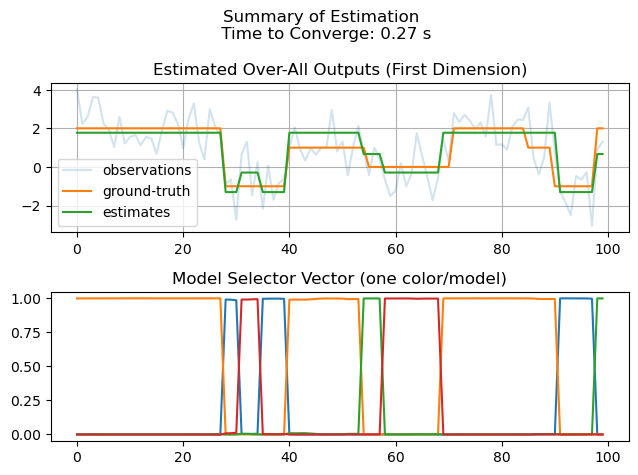

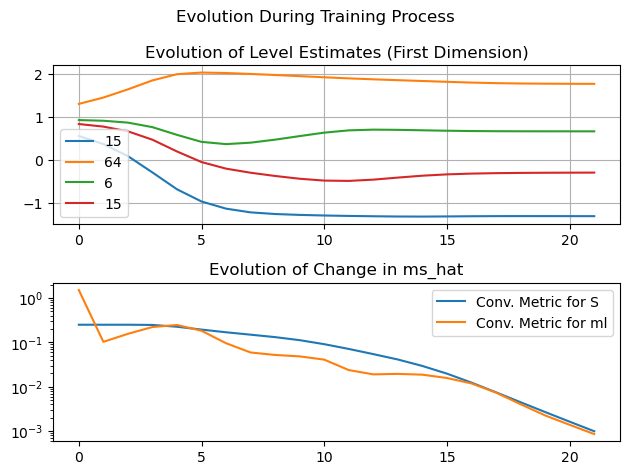

In [3]:
# Specify how many levels should be assumed. Here, the correct amount (i.e., M) is given.
M_init = M

########################################################################################################################

# Initialize estimator
estimator = CLFModel(N=N, M=M_init, D=D)

# Do estimation with 'levelEstType' = 'superPos' (this is the default configuration)
performanceMetrics, ml_hat_evol, i_it, conv_time = estimator.estimate_output(y=y)

########################################################################################################################

# Get estimates
outputs = estimator.get_output()
ms_hat,_ = estimator.modelSelector.get_sHat()

# Plot estimations
fig2, axs2 = plt.subplots(2,1)

axs2[0].plot(y[:,0], alpha=0.2, label='observations')
axs2[0].plot(x[:,0], label='ground-truth')
axs2[0].plot(outputs[:,0], label='estimates')
axs2[0].legend()
axs2[0].grid()
axs2[0].set_title('Estimated Over-All Outputs (First Dimension)')

axs2[1].plot(ms_hat)
axs2[1].set_title('Model Selector Vector (one color/model)')

fig2.suptitle(f'Summary of Estimation \n Time to Converge: {round(conv_time, 2)} s')
fig2.tight_layout()

########################################################################################################################

# Plot evolution of level estimates
fig3, axs3 = plt.subplots(2,1)

sMaxInd = np.argmax(ms_hat, axis=1)
countModels = np.array([np.count_nonzero(sMaxInd == m) for m in range(M_init)])
print(ml_hat_evol.shape)

for m, level_m_evol in enumerate(np.transpose(ml_hat_evol, (1,0,2))):
    if countModels[m] > 0:
        axs3[0].plot(level_m_evol[:i_it+1,0], label=f'{countModels[m]}')
    else:
        axs3[0].plot(level_m_evol[:i_it+1,0], alpha=0.3)
axs3[0].legend()
axs3[0].set_title('Evolution of Level Estimates (First Dimension)')
axs3[0].grid()

axs3[1].plot(performanceMetrics.iloc[:i_it+1,0], label='Conv. Metric for S')
axs3[1].plot(performanceMetrics.iloc[:i_it+1,2], label='Conv. Metric for ml')
axs3[1].set_title('Evolution of Change in ms_hat')
axs3[1].set_yscale('log')
axs3[1].legend()

fig3.suptitle('Evolution During Training Process')
fig3.tight_layout()

## Estimation
with 'levelEstType' = 'selective'

  2%|█▍                                                                              | 18/1000 [00:00<00:11, 82.40it/s]


(1000, 4, 1)


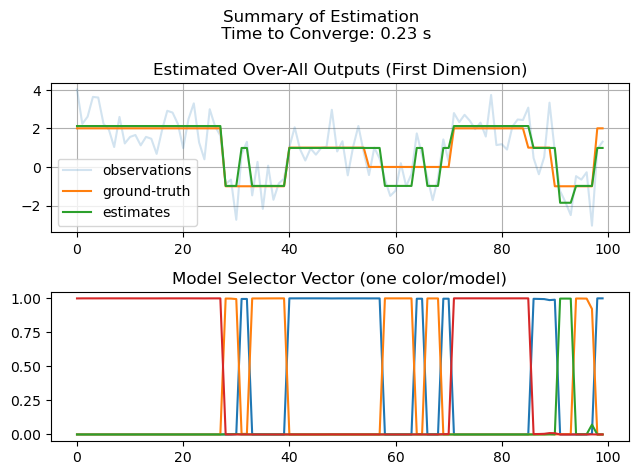

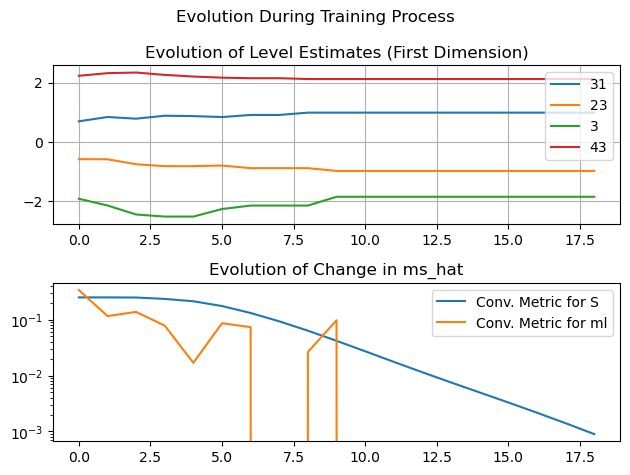

In [4]:
# Specify how many levels should be assumed. Here, the correct amount (i.e., M) is given.
M_init = M

########################################################################################################################

# Initialize estimator
estimator = CLFModel(N=N, M=M_init, D=D)

# Do estimation with 'levelEstType' = 'selective'
performanceMetrics, ml_hat_evol, i_it, conv_time = estimator.estimate_output(y=y, levelEstType='selective')

########################################################################################################################

# Get estimates
outputs = estimator.get_output()
ms_hat,_ = estimator.modelSelector.get_sHat()

# Plot estimations
fig2, axs2 = plt.subplots(2,1)

axs2[0].plot(y[:,0], alpha=0.2, label='observations')
axs2[0].plot(x[:,0], label='ground-truth')
axs2[0].plot(outputs[:,0], label='estimates')
axs2[0].legend()
axs2[0].grid()
axs2[0].set_title('Estimated Over-All Outputs (First Dimension)')

axs2[1].plot(ms_hat)
axs2[1].set_title('Model Selector Vector (one color/model)')

fig2.suptitle(f'Summary of Estimation \n Time to Converge: {round(conv_time, 2)} s')
fig2.tight_layout()

########################################################################################################################

# Plot evolution of level estimates
fig3, axs3 = plt.subplots(2,1)

sMaxInd = np.argmax(ms_hat, axis=1)
countModels = np.array([np.count_nonzero(sMaxInd == m) for m in range(M_init)])
print(ml_hat_evol.shape)

for m, level_m_evol in enumerate(np.transpose(ml_hat_evol, (1,0,2))):
    if countModels[m] > 0:
        axs3[0].plot(level_m_evol[:i_it+1,0], label=f'{countModels[m]}')
    else:
        axs3[0].plot(level_m_evol[:i_it+1,0], alpha=0.3)
axs3[0].legend()
axs3[0].set_title('Evolution of Level Estimates (First Dimension)')
axs3[0].grid()

axs3[1].plot(performanceMetrics.iloc[:i_it+1,0], label='Conv. Metric for S')
axs3[1].plot(performanceMetrics.iloc[:i_it+1,2], label='Conv. Metric for ml')
axs3[1].set_title('Evolution of Change in ms_hat')
axs3[1].set_yscale('log')
axs3[1].legend()

fig3.suptitle('Evolution During Training Process')
fig3.tight_layout()

# 3-Dimensional Case

## Data Generation

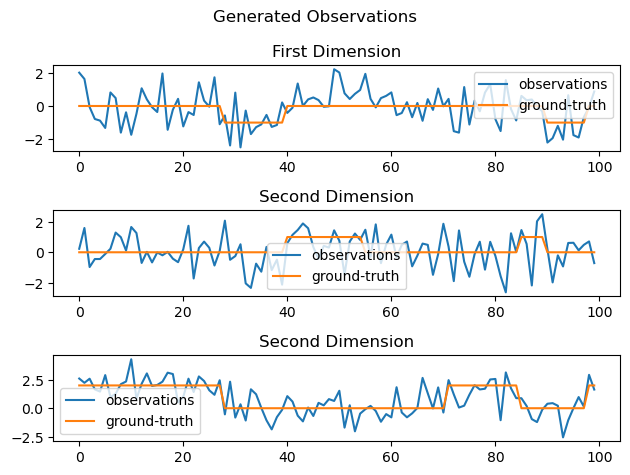

In [5]:
# Specify parameters
N = 100
M = 4
D = 3
varNoise = 1.0
seed = 0

np.random.seed(seed)

levels = np.array([[-1.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 2.0]])
selectedLevels = np.zeros(N, dtype=int)
ind_start = 0
while ind_start < N:
    ind_stop = ind_start + np.random.randint(low=int(N/20), high=int(N/10))
    selectedLevels[ind_start:ind_stop] = np.random.randint(low=0, high=M)
    ind_start = ind_stop
    
x = np.array([levels[selectedLevel_i] for selectedLevel_i in selectedLevels])
y = np.random.normal(x,varNoise)

fig4, axs4 = plt.subplots(3,1)

axs4[0].plot(y[:,0], label='observations')
axs4[0].plot(x[:,0], label='ground-truth')
axs4[0].legend()
axs4[0].set_title('First Dimension')

axs4[1].plot(y[:,1], label='observations')
axs4[1].plot(x[:,1], label='ground-truth')
axs4[1].legend()
axs4[1].set_title('Second Dimension')

axs4[2].plot(y[:,2], label='observations')
axs4[2].plot(x[:,2], label='ground-truth')
axs4[2].legend()
axs4[2].set_title('Second Dimension')

fig4.suptitle('Generated Observations')
fig4.tight_layout()

## Estimation

 31%|████████████████████████▌                                                      | 311/1000 [00:03<00:07, 95.10it/s]


(1000, 4, 3)


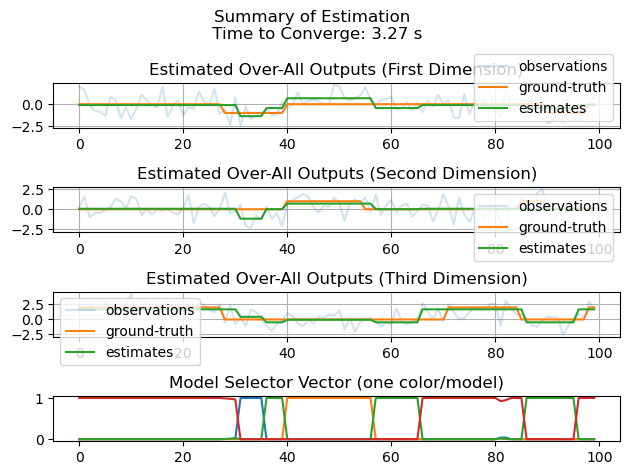

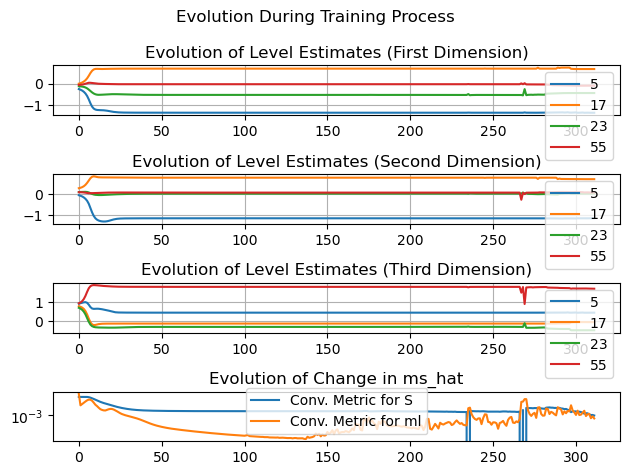

In [6]:
# Specify how many levels should be assumed. Here, the correct amount (i.e., M) is given.
M_init = M

########################################################################################################################

# Initialize estimator
estimator = CLFModel(N=N, M=M_init, D=D)

# Do estimation
performanceMetrics, ml_hat_evol, i_it, conv_time = estimator.estimate_output(y=y)

########################################################################################################################

# Get estimates
outputs = estimator.get_output()
ms_hat,_ = estimator.modelSelector.get_sHat()

# Plot estimations
fig5, axs5 = plt.subplots(4,1)

axs5[0].plot(y[:,0], alpha=0.2, label='observations')
axs5[0].plot(x[:,0], label='ground-truth')
axs5[0].plot(outputs[:,0], label='estimates')
axs5[0].legend()
axs5[0].grid()
axs5[0].set_title('Estimated Over-All Outputs (First Dimension)')

axs5[1].plot(y[:,1], alpha=0.2, label='observations')
axs5[1].plot(x[:,1], label='ground-truth')
axs5[1].plot(outputs[:,1], label='estimates')
axs5[1].legend()
axs5[1].grid()
axs5[1].set_title('Estimated Over-All Outputs (Second Dimension)')

axs5[2].plot(y[:,2], alpha=0.2, label='observations')
axs5[2].plot(x[:,2], label='ground-truth')
axs5[2].plot(outputs[:,2], label='estimates')
axs5[2].legend()
axs5[2].grid()
axs5[2].set_title('Estimated Over-All Outputs (Third Dimension)')

axs5[3].plot(ms_hat)
axs5[3].set_title('Model Selector Vector (one color/model)')

fig5.suptitle(f'Summary of Estimation \n Time to Converge: {round(conv_time, 2)} s')
fig5.tight_layout()

########################################################################################################################

# Plot evolution of level estimates
fig6, axs6 = plt.subplots(4,1)

sMaxInd = np.argmax(ms_hat, axis=1)
countModels = np.array([np.count_nonzero(sMaxInd == m) for m in range(M_init)])
print(ml_hat_evol.shape)

for m, level_m_evol in enumerate(np.transpose(ml_hat_evol, (1,0,2))):
    if countModels[m] > 0:
        axs6[0].plot(level_m_evol[:i_it+1,0], label=f'{countModels[m]}')
    else:
        axs6[0].plot(level_m_evol[:i_it+1,0], alpha=0.3)
axs6[0].legend()
axs6[0].set_title('Evolution of Level Estimates (First Dimension)')
axs6[0].grid()

for m, level_m_evol in enumerate(np.transpose(ml_hat_evol, (1,0,2))):
    if countModels[m] > 0:
        axs6[1].plot(level_m_evol[:i_it+1,1], label=f'{countModels[m]}')
    else:
        axs6[1].plot(level_m_evol[:i_it+1,1], alpha=0.3)
axs6[1].legend()
axs6[1].set_title('Evolution of Level Estimates (Second Dimension)')
axs6[1].grid()

for m, level_m_evol in enumerate(np.transpose(ml_hat_evol, (1,0,2))):
    if countModels[m] > 0:
        axs6[2].plot(level_m_evol[:i_it+1,2], label=f'{countModels[m]}')
    else:
        axs6[2].plot(level_m_evol[:i_it+1,2], alpha=0.3)
axs6[2].legend()
axs6[2].set_title('Evolution of Level Estimates (Third Dimension)')
axs6[2].grid()

axs6[3].plot(performanceMetrics.iloc[:i_it+1,0], label='Conv. Metric for S')
axs6[3].plot(performanceMetrics.iloc[:i_it+1,2], label='Conv. Metric for ml')
axs6[3].set_title('Evolution of Change in ms_hat')
axs6[3].set_yscale('log')
axs6[3].legend()

fig6.suptitle('Evolution During Training Process')
fig6.tight_layout()